In [52]:
import numpy as np
import matplotlib.pyplot as plt
from hamming_distance_distribution import hamming_distance
from annealing import is_connected, adjacency_from_couplings

In [53]:
def annealing_by_connection(blocksize, fname):

    # read data from file
    data = np.load(fname, allow_pickle=True).item()

    N_blocks = int(data['size']/blocksize)
    N_correct_connected     = np.zeros(N_blocks)
    N_correct_unconnected   = np.zeros(N_blocks)
    N_connected             = np.zeros(N_blocks)
    N_unconnected           = np.zeros(N_blocks)

    for j in range(N_blocks):

        for i in range(blocksize):
            # get annealing results
            J_n         = data["J_n"][j*blocksize + i]
            alpha       = data["alpha"][j*blocksize + i]
            gs_array1   = data["gs_array"][j*blocksize + i]
      
            # classify annealing result
            d_Hamming = hamming_distance(alpha, gs_array1)
            connected = is_connected(adjacency_from_couplings(J_n))

            if connected:
                N_connected[j] += 1
                if d_Hamming==0:
                    N_correct_connected[j] += 1

            if not connected:
                N_unconnected[j] += 1
                if d_Hamming==0:
                    N_correct_unconnected[j] += 1

    return N_correct_connected, N_correct_unconnected, N_connected, N_unconnected


In [54]:
# ---------- Parameters for reading data file -------------
path = "./annealing_data/"

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

thres_min = 0.0
thres_max = 0.4
thres_step = 0.01

blocksize = 100       # resolution of y axis (equal to N_repeat from other program)

In [55]:
# ---------- Program ----------
thres_min = float(thres_min)
thres_max = float(thres_max)

N_neglection_thres = int((thres_max-thres_min)/thres_step)+1
data = np.load(path + f"neglection_thres_{thres_min}_N_5_M_4_K_100_xi_0.npy", allow_pickle=True).item()

N_blocks = int(data["size"]/blocksize)
print(f"file includes {data['size']} runs which get split into {N_blocks} blocks of size {blocksize}.")
N_stat = N_blocks

N_correct_connected     = np.zeros(shape=(N_neglection_thres, N_stat))
N_correct_unconnected   = np.zeros(shape=(N_neglection_thres, N_stat))
N_connected             = np.zeros(shape=(N_neglection_thres, N_stat))
N_unconnected           = np.zeros(shape=(N_neglection_thres, N_stat))

neglection_thres = np.zeros(N_neglection_thres)

for i in range(N_neglection_thres):
    neglection_thres[i] = thres_min + i*thres_step
    neglection_thres[i] = np.round(neglection_thres[i], 6)

    fname = path + f"neglection_thres_{neglection_thres[i]}_N_{N}_M_{M}_K_{K}_xi_{xi}.npy"
    print(f"{i}: {fname}")
    result = annealing_by_connection(blocksize, fname)

    N_correct_connected[i]      = result[0]
    N_correct_unconnected[i]    = result[1]
    N_connected[i]              = result[2]
    N_unconnected[i]            = result[3]


file includes 300 runs which get split into 3 blocks of size 100.
0: ./annealing_data/neglection_thres_0.0_N_5_M_4_K_100_xi_0.npy
1: ./annealing_data/neglection_thres_0.01_N_5_M_4_K_100_xi_0.npy
2: ./annealing_data/neglection_thres_0.02_N_5_M_4_K_100_xi_0.npy
3: ./annealing_data/neglection_thres_0.03_N_5_M_4_K_100_xi_0.npy
4: ./annealing_data/neglection_thres_0.04_N_5_M_4_K_100_xi_0.npy
5: ./annealing_data/neglection_thres_0.05_N_5_M_4_K_100_xi_0.npy
6: ./annealing_data/neglection_thres_0.06_N_5_M_4_K_100_xi_0.npy
7: ./annealing_data/neglection_thres_0.07_N_5_M_4_K_100_xi_0.npy
8: ./annealing_data/neglection_thres_0.08_N_5_M_4_K_100_xi_0.npy
9: ./annealing_data/neglection_thres_0.09_N_5_M_4_K_100_xi_0.npy
10: ./annealing_data/neglection_thres_0.1_N_5_M_4_K_100_xi_0.npy
11: ./annealing_data/neglection_thres_0.11_N_5_M_4_K_100_xi_0.npy
12: ./annealing_data/neglection_thres_0.12_N_5_M_4_K_100_xi_0.npy
13: ./annealing_data/neglection_thres_0.13_N_5_M_4_K_100_xi_0.npy
14: ./annealing_data/n

In [56]:
# ratios
if len(np.where(N_connected==0)[0])>0:
    print(f"Division by zero: N_connected   = 0 at {np.where(N_connected==0)}")
if len(np.where(N_unconnected==0)[0])>0:
    print(f"Division by zero: N_unconnected = 0 at {np.where(N_unconnected==0)}")

r_correct_connected     = N_correct_connected   /   N_connected
r_correct_unconnected   = N_correct_unconnected /   N_unconnected

Division by zero: N_connected   = 0 at (array([28, 29, 30, 30, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35,
       36, 36, 36, 37, 37, 37, 38, 38, 38, 39, 39, 39, 40, 40, 40]), array([2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2]))
Division by zero: N_unconnected = 0 at (array([0, 0, 0, 1, 1]), array([0, 1, 2, 1, 2]))


/tmp/ipykernel_11990/3773222365.py:7: RuntimeWarning: invalid value encountered in divide
  r_correct_connected     = N_correct_connected   /   N_connected
/tmp/ipykernel_11990/3773222365.py:8: RuntimeWarning: invalid value encountered in divide
  r_correct_unconnected   = N_correct_unconnected /   N_unconnected


In [57]:
# statistics
r_correct_connected_mean    = np.mean(r_correct_connected, axis=1)
dr_correct_connected        = np.std(r_correct_connected, axis=1)
dr_mean_correct_connected   = dr_correct_connected / np.sqrt(N_stat)

r_correct_unconnected_mean  = np.mean(r_correct_unconnected, axis=1)
dr_correct_unconnected      = np.std(r_correct_unconnected, axis=1)
dr_mean_correct_unconnected = dr_correct_unconnected / np.sqrt(N_stat)

total number of runs per neglection thresold: 100
obtained ratios:
correct connected: 
[0.89       0.92979798 0.90127465 0.8937559  0.90365053 0.90666451
 0.91106784 0.87432996 0.84391741 0.89057239 0.8627451  0.87992288
 0.82792793 0.86324786 0.97568523 0.75455706 0.76893939 0.79993386
 0.79365079 0.66388889 0.68333333 0.85185185 0.81904762 0.67142857
 0.72222222 0.66666667 0.5        0.66666667        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan] +- [0.00471405 0.00457194 0.01765207 0.01391595 0.00891554 0.00739814
 0.01020548 0.00674421 0.01497404 0.02622519 0.04235778 0.00954092
 0.01802177 0.02904307 0.00997066 0.0120192  0.0461852  0.00907234
 0.03240066 0.2222338  0.07576768 0.12096246 0.09555503 0.07284314
 0.12001372 0.13608276 0.23570226 0.13608276        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan     

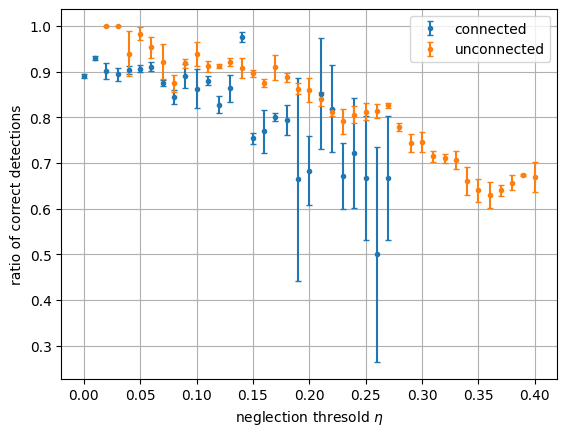

In [58]:
# Results

print(f"total number of runs per neglection thresold: {blocksize}")
print("obtained ratios:")
print(f"correct connected: \n{r_correct_connected_mean} +- {dr_mean_correct_connected}, \nunconnected: \n{r_correct_unconnected_mean} +- {dr_correct_unconnected}")

# Plotting
plt.errorbar(x=neglection_thres, y=r_correct_connected_mean, yerr=dr_mean_correct_connected, label="connected", capsize=2, ls="none", marker=".")
plt.errorbar(x=neglection_thres, y=r_correct_unconnected_mean, yerr=dr_mean_correct_unconnected, label="unconnected", capsize=2, ls="none", marker=".")
plt.xlabel(r"neglection thresold $\eta$")
plt.ylabel("ratio of correct detections")
plt.legend()
plt.grid()
plt.show()